In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [5]:
TRAIN_DATASET_PATH = 'datasets/train.csv'
TEST_DATASET_PATH = 'datasets/test.csv'

In [6]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [7]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


In [8]:
train_df.shape[1]-1 == test_df.shape[1]

True

### Меняем типы

In [9]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [10]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)
train_df['Rooms'] = train_df['Rooms'].astype(np.int8)
train_df['HouseFloor'] = train_df['HouseFloor'].astype(np.int8)
train_df.dtypes


Id                object
DistrictId        object
Rooms               int8
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor          int8
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

### Строим гистограмму распределения стоимости квартир

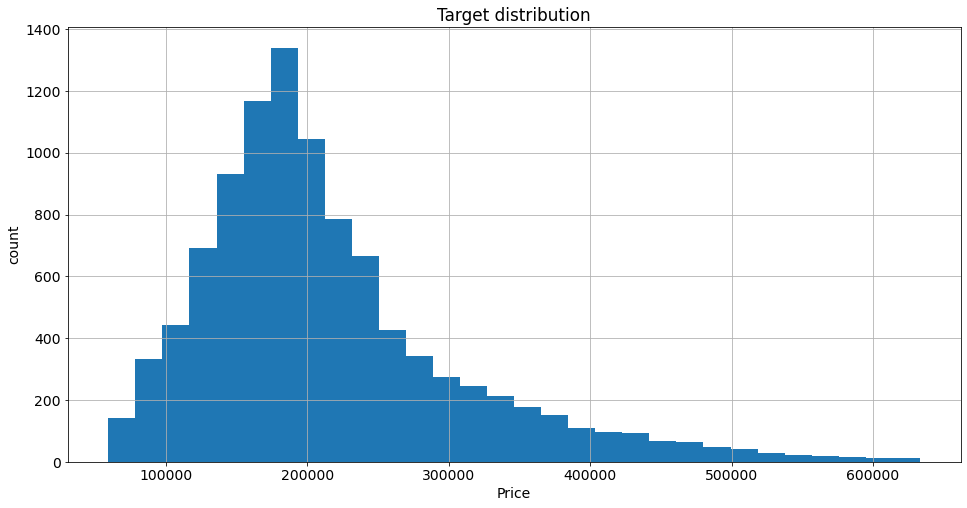

In [11]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

### строим гистограммы для всех признаков

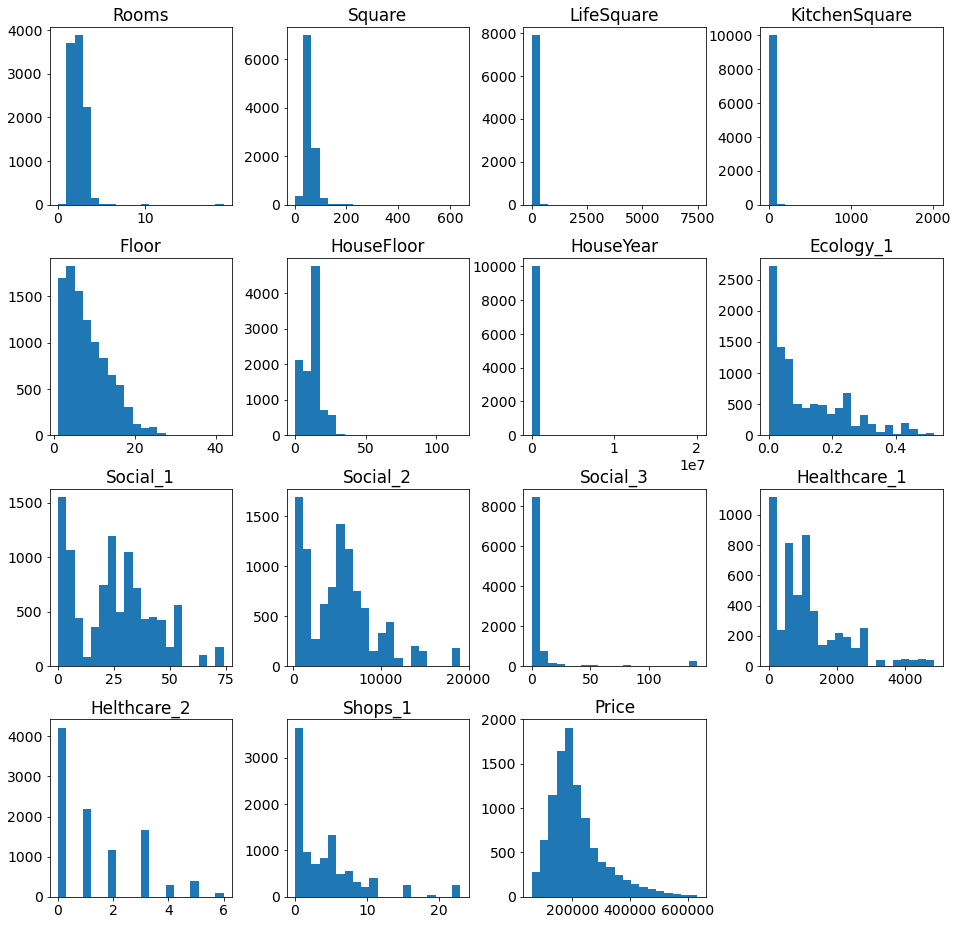

In [12]:
train_df.hist(figsize=(16,16), bins=20, grid=False);

In [13]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [14]:
train_df.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [15]:
train_df['DistrictId'].value_counts().head()

27    851
1     652
23    565
6     511
9     294
Name: DistrictId, dtype: int64

In [16]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [17]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [18]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

### Обрабатываем выбросы

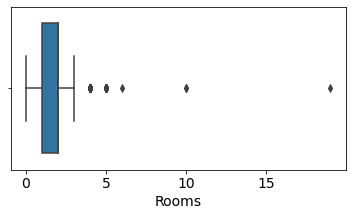

In [19]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['Rooms'], whis=1.5)

plt.xlabel('Rooms')
plt.show()

In [20]:
train_df = train_df[train_df['KitchenSquare'].isnull() |
                    (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.975))]

In [21]:
train_df['Rooms'].value_counts()

2     3796
1     3626
3     2161
4      134
5       15
0        8
10       2
19       1
6        1
Name: Rooms, dtype: int64

In [22]:
train_df.loc[train_df['Rooms'].isin([0, 10, 19]), 'Rooms'] = train_df['Rooms'].median()

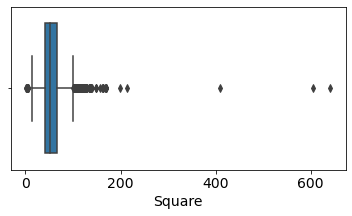

In [23]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['Square'], whis=1.5)

plt.xlabel('Square')
plt.show()

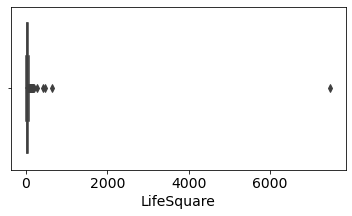

In [24]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['LifeSquare'], whis=1.5)

plt.xlabel('LifeSquare')
plt.show()

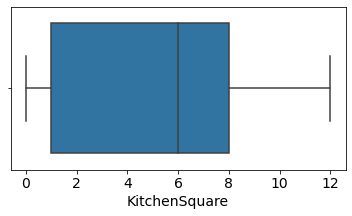

In [25]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['KitchenSquare'], whis=1.5)

plt.xlabel('KitchenSquare')
plt.show()

In [26]:
train_df = train_df[train_df['Square'].isnull() |
                    (train_df['Square'] < train_df['Square'].quantile(.975)) &
                    (train_df['Square'] > train_df['Square'].quantile(.025))]

train_df = train_df[train_df['LifeSquare'].isnull() |
                    (train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.975)) &
                    (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.025))]




train_df = train_df[train_df['KitchenSquare'].isnull() |
                    (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.975))]

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,8669.000000,8669.000000,6690.000000,8669.000000,8669.000000,8669.000000,8.669000e+03,8669.000000,8669.000000,8669.000000,8669.000000,4560.000000,8669.000000,8669.000000,8669.000000
mean,1.845657,53.670900,34.488493,6.181567,8.437651,12.551736,4.296461e+03,0.119625,25.307302,5465.641366,8.170146,1150.115351,1.348714,4.334295,208270.230585
std,0.769118,14.517355,12.444699,2.607234,5.103357,6.498571,2.153429e+05,0.120509,17.496454,4006.731538,23.940334,1026.019111,1.482977,4.823550,83354.966230
min,1.000000,32.040530,5.996579,3.000000,1.000000,0.000000,1.914000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.676668,23.183306,3.000000,4.000000,9.000000,1.973000e+03,0.017647,8.000000,1892.000000,0.000000,350.000000,0.000000,1.000000,154045.569730
50%,2.000000,50.381206,32.420501,6.000000,7.000000,12.000000,1.977000e+03,0.075779,25.000000,5288.000000,2.000000,990.000000,1.000000,3.000000,190326.383375
75%,2.000000,63.523148,43.447257,8.000000,12.000000,17.000000,1.995000e+03,0.195781,36.000000,7425.000000,5.000000,1548.000000,3.000000,6.000000,242957.801623
max,6.000000,96.208578,75.664300,11.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Оценим выбросы после манипуляций

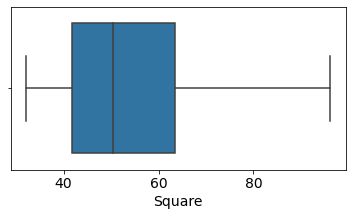

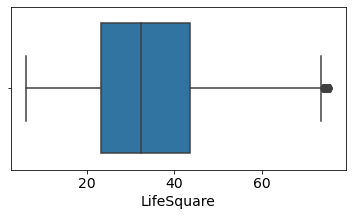

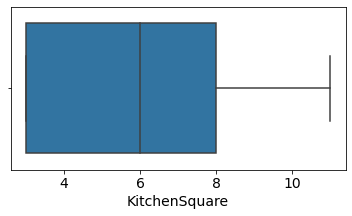

In [27]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['Square'], whis=1.5)

plt.xlabel('Square')
plt.show()
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['LifeSquare'], whis=1.5)

plt.xlabel('LifeSquare')
plt.show()
plt.figure(figsize=(6, 3))

sns.boxplot(train_df['KitchenSquare'], whis=1.5)

plt.xlabel('KitchenSquare')
plt.show()

In [28]:
train_df['HouseFloor'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  29,  30,  32,  37,  38,  40,  44,  45,  48,  99, 117],
      dtype=int8)

In [29]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 31, 32, 33, 37, 42],
      dtype=int64)

### Принимаю, что этаж квартиры выше этажности дома равен макс этажу в доме 

In [30]:
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'Floor']=train_df['HouseFloor']

In [31]:
train_df['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
3171        2020
7246        2020
7207        2020
          ...   
9927        1918
7867        1917
485         1917
1572        1917
6250        1914
Name: HouseYear, Length: 8669, dtype: int64

In [32]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

### Обработка пропусков

In [33]:
train_df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1979
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4109
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [34]:
square_med_diff = (train_df.loc[train_df['LifeSquare'].notnull(), 'Square'] -\
                   train_df.loc[train_df['LifeSquare'].notnull(), 'LifeSquare'] -\
                   train_df.loc[train_df['LifeSquare'].notnull(), 'KitchenSquare']).median()

In [35]:
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] =\
train_df.loc[train_df['LifeSquare'].isnull(), 'Square'] -\
train_df.loc[train_df['LifeSquare'].isnull(), 'KitchenSquare'] -\
square_med_diff

In [36]:

train_df['Healthcare_1'].fillna(train_df['Healthcare_1'].median(), inplace=True)

### Построение новых признаков

In [37]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0, 'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
1,3013,22,1.0,39.832524,23.169223,8.0,7,8,1966,0.118537,...,6207,1,1183.0,1,0,B,177734.553407,1,1,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17,1988,0.025609,...,5261,0,240.0,3,1,B,282078.720850,1,1,1
3,2352,1,1.0,40.409907,26.115473,3.0,10,22,1977,0.007122,...,264,0,990.0,0,1,B,168106.007630,1,1,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16,1972,0.282798,...,8667,2,990.0,0,6,B,343995.102962,1,1,1
5,5804,99,3.0,62.528465,47.103833,6.0,9,9,1972,0.012339,...,5776,1,2078.0,2,4,B,161044.944138,1,1,1


### Популярность района

In [38]:
district_popularity = train_df['DistrictId'].value_counts().reset_index() \
.rename(columns={'index':'DistrictId', 'DistrictId':'DistrictPopularity'})

district_popularity.head()

,DistrictId,DistrictPopularity
0,27,682
1,1,588
2,23,456
3,6,416
4,9,260


In [39]:
train_df = train_df.merge(district_popularity, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictPopularity
0,3013,22,1.0,39.832524,23.169223,8.0,7,8,1966,0.118537,...,1,1183.0,1,0,B,177734.553407,1,1,1,71
1,8215,1,3.0,78.342215,47.671972,10.0,2,17,1988,0.025609,...,0,240.0,3,1,B,282078.720850,1,1,1,588
2,2352,1,1.0,40.409907,26.115473,3.0,10,22,1977,0.007122,...,0,990.0,0,1,B,168106.007630,1,1,1,588
3,13866,94,2.0,64.285067,38.562517,9.0,16,16,1972,0.282798,...,2,990.0,0,6,B,343995.102962,1,1,1,86
4,5804,99,3.0,62.528465,47.103833,6.0,9,9,1972,0.012339,...,1,2078.0,2,4,B,161044.944138,1,1,1,94


### Цена квартиры в районе

In [40]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                        .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202788.820829


In [41]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictPopularity,MedPriceByDistrict
0,3013,22,1.0,39.832524,23.169223,8.0,7,8,1966,0.118537,...,1183.0,1,0,B,177734.553407,1,1,1,71,140393.887533
1,8215,1,3.0,78.342215,47.671972,10.0,2,17,1988,0.025609,...,240.0,3,1,B,282078.720850,1,1,1,588,244044.141164
2,2352,1,1.0,40.409907,26.115473,3.0,10,22,1977,0.007122,...,990.0,0,1,B,168106.007630,1,1,1,588,146735.671740
3,13866,94,2.0,64.285067,38.562517,9.0,16,16,1972,0.282798,...,990.0,0,6,B,343995.102962,1,1,1,86,201584.441255
4,5804,99,3.0,62.528465,47.103833,6.0,9,9,1972,0.012339,...,2078.0,2,4,B,161044.944138,1,1,1,94,223960.229617


## Добавим признак средней стоимости кв. метра по району

In [42]:
med_price_ofsqm = train_df[['DistrictId','Square','Price']]
med_price_ofsqm['pricepm'] = med_price_ofsqm['Price']/med_price_ofsqm['Square']
med_price_ofsqm=med_price_ofsqm.groupby(['DistrictId'], as_index=False).agg({'pricepm':'median'})
med_price_ofsqm.head()

,DistrictId,pricepm
0,0,3809.982201
1,1,3263.903559
2,10,4413.621571
3,100,4913.910944
4,101,4179.777640


In [43]:
train_df = train_df.merge(med_price_ofsqm, on=['DistrictId'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictPopularity,MedPriceByDistrict,pricepm
0,3013,22,1.0,39.832524,23.169223,8.0,7,8,1966,0.118537,...,1,0,B,177734.553407,1,1,1,71,140393.887533,3503.703684
1,8215,1,3.0,78.342215,47.671972,10.0,2,17,1988,0.025609,...,3,1,B,282078.720850,1,1,1,588,244044.141164,3263.903559
2,2352,1,1.0,40.409907,26.115473,3.0,10,22,1977,0.007122,...,0,1,B,168106.007630,1,1,1,588,146735.671740,3263.903559
3,13866,94,2.0,64.285067,38.562517,9.0,16,16,1972,0.282798,...,0,6,B,343995.102962,1,1,1,86,201584.441255,4219.667931
4,5804,99,3.0,62.528465,47.103833,6.0,9,9,1972,0.012339,...,2,4,B,161044.944138,1,1,1,94,223960.229617,3991.931930


### Отбор признаков

In [44]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictPopularity',
 'MedPriceByDistrict',
 'pricepm']

In [45]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin']

In [46]:
new_feature_names = ['DistrictPopularity', 'MedPriceByDistrict','pricepm']

In [47]:
target_name = 'Price'

### Разбиение на train и test

In [48]:
X = train_df[feature_names + new_feature_names]
y = train_df[target_name]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

### Построение модели

R2:	0.762
RMSE:	40275.331
MSE:	1622102282.292


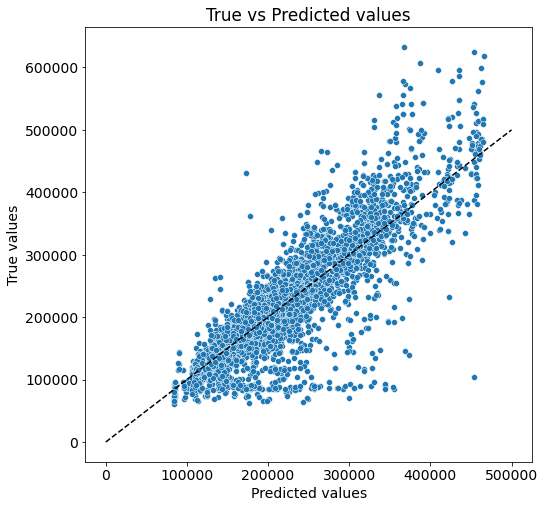

In [50]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=20, # глубина дерева  
                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 n_estimators=100)
rf_model.fit(X_train, y_train)
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)


R2:	0.742
RMSE:	43112.072
MSE:	1858650721.193


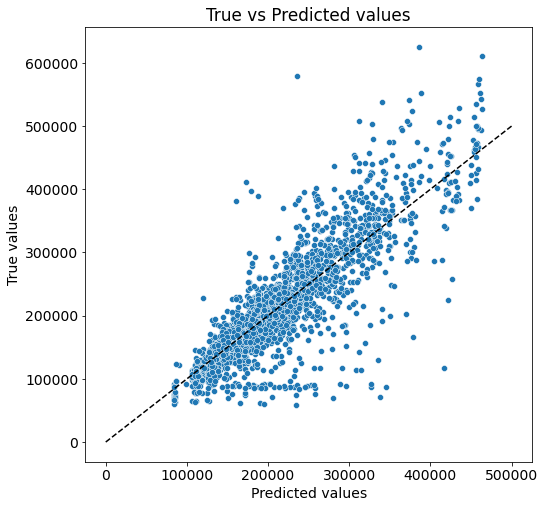

In [51]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [52]:
cv_score = cross_val_score(rf_model, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.73862305, 0.71558596, 0.73014938])

In [53]:
cv_score.mean()

0.7281194638709995

In [54]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
18,MedPriceByDistrict,0.802339
1,Square,0.089292
19,pricepm,0.044902
3,KitchenSquare,0.013270
10,Social_1,0.007956
2,LifeSquare,0.006259
12,Social_3,0.005799
11,Social_2,0.005291
17,DistrictPopularity,0.004779
5,HouseFloor,0.004643


# Работа с тестовым датасетом

In [55]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


### Меняем типы

In [56]:
test_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [57]:
test_df['Id'] = test_df['Id'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)
test_df['Rooms'] = test_df['Rooms'].astype(np.int8)
test_df['HouseFloor'] = test_df['HouseFloor'].astype(np.int8)
test_df.dtypes


Id                object
DistrictId        object
Rooms               int8
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor          int8
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

### Обрабатываем выбросы
На мой взгляд стоит оставить даже недекватные значения площадей квартир ведь в реальной жизни нас могут попросить спрогнозировать что угодно

### Принимаю, что этаж квартиры выше этажности дома равен макс этажу в доме 

In [58]:
test_df.loc[test_df['Floor'] > test_df['HouseFloor'], 'Floor']=test_df['HouseFloor']

In [59]:
test_df['HouseYear'].sort_values(ascending=False)

1235    2020
3016    2020
4416    2020
32      2020
3959    2020
        ... 
4836    1912
4046    1911
2990    1910
3166    1909
1929    1908
Name: HouseYear, Length: 5000, dtype: int64

In [60]:
test_df.loc[test_df['HouseYear'] > 2020, 'HouseYear'] = 2020

### Обработка пропусков

In [74]:
test_df.isna().sum()

Id                      0
DistrictId              0
Rooms                   0
Square                  0
LifeSquare              0
KitchenSquare           0
Floor                   0
HouseFloor              0
HouseYear               0
Ecology_1               0
Ecology_2               0
Ecology_3               0
Social_1                0
Social_2                0
Social_3                0
Healthcare_1            0
Helthcare_2             0
Shops_1                 0
Shops_2                 0
Ecology_2_bin           0
Ecology_3_bin           0
Shops_2_bin             0
DistrictPopularity      0
MedPriceByDistrict    104
pricepm                 8
dtype: int64

In [62]:
square_med_diff = (test_df.loc[test_df['LifeSquare'].notnull(), 'Square'] -\
                   test_df.loc[test_df['LifeSquare'].notnull(), 'LifeSquare'] -\
                   test_df.loc[test_df['LifeSquare'].notnull(), 'KitchenSquare']).median()

In [63]:
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] =\
test_df.loc[test_df['LifeSquare'].isnull(), 'Square'] -\
test_df.loc[test_df['LifeSquare'].isnull(), 'KitchenSquare'] -\
square_med_diff

In [64]:

test_df['Healthcare_1'].fillna(test_df['Healthcare_1'].median(), inplace=True)

### Построение новых признаков

In [65]:
test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A':0, 'B':1})
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace({'A':0, 'B':1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A':0, 'B':1})
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,4567,44,1,36.847630,19.094182,5.0,5,9,1970,0.036122,...,24,4378,0,1036.0,1,1,B,1,1,1
1,5925,62,1,42.493907,42.568133,10.0,7,17,2017,0.072158,...,2,629,1,900.0,0,0,A,1,1,0
2,960,27,2,59.463678,39.076294,9.0,19,19,1977,0.211401,...,9,1892,0,900.0,0,1,B,1,1,1
3,3848,23,3,49.646030,33.893825,6.0,2,2,1965,0.014073,...,2,475,0,900.0,0,0,B,1,1,1
4,746,74,1,53.837056,41.449671,1.0,8,17,1977,0.309479,...,35,7715,4,990.0,0,6,B,1,1,1


### Популярность района

In [66]:
district_popularity = test_df['DistrictId'].value_counts().reset_index() \
.rename(columns={'index':'DistrictId', 'DistrictId':'DistrictPopularity'})

district_popularity.head()

,DistrictId,DistrictPopularity
0,27,391
1,1,344
2,23,264
3,6,257
4,9,132


In [67]:
test_df = test_df.merge(district_popularity, on='DistrictId', how='left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictPopularity
0,4567,44,1,36.847630,19.094182,5.0,5,9,1970,0.036122,...,4378,0,1036.0,1,1,B,1,1,1,46
1,5925,62,1,42.493907,42.568133,10.0,7,17,2017,0.072158,...,629,1,900.0,0,0,A,1,1,0,122
2,960,27,2,59.463678,39.076294,9.0,19,19,1977,0.211401,...,1892,0,900.0,0,1,B,1,1,1,391
3,3848,23,3,49.646030,33.893825,6.0,2,2,1965,0.014073,...,475,0,900.0,0,0,B,1,1,1,264
4,746,74,1,53.837056,41.449671,1.0,8,17,1977,0.309479,...,7715,4,990.0,0,6,B,1,1,1,61


### Цена квартиры в районе

In [68]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                        .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146735.671740
4,1,2.0,202788.820829


In [69]:
test_df = test_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictPopularity,MedPriceByDistrict
0,4567,44,1,36.847630,19.094182,5.0,5,9,1970,0.036122,...,0,1036.0,1,1,B,1,1,1,46,171834.407390
1,5925,62,1,42.493907,42.568133,10.0,7,17,2017,0.072158,...,1,900.0,0,0,A,1,1,0,122,128925.795590
2,960,27,2,59.463678,39.076294,9.0,19,19,1977,0.211401,...,0,900.0,0,1,B,1,1,1,391,165683.084779
3,3848,23,3,49.646030,33.893825,6.0,2,2,1965,0.014073,...,0,900.0,0,0,B,1,1,1,264,139767.862602
4,746,74,1,53.837056,41.449671,1.0,8,17,1977,0.309479,...,4,990.0,0,6,B,1,1,1,61,165143.586826


## Добавим признак средней стоимости кв. метра по району

In [70]:
med_price_ofsqm = train_df[['DistrictId','Square','Price']]
med_price_ofsqm['pricepm'] = med_price_ofsqm['Price']/med_price_ofsqm['Square']
med_price_ofsqm=med_price_ofsqm.groupby(['DistrictId'], as_index=False).agg({'pricepm':'median'})
med_price_ofsqm.head()

,DistrictId,pricepm
0,0,3809.982201
1,1,3263.903559
2,10,4413.621571
3,100,4913.910944
4,101,4179.777640


In [71]:
test_df = test_df.merge(med_price_ofsqm, on=['DistrictId'], how='left')
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictPopularity,MedPriceByDistrict,pricepm
0,4567,44,1,36.847630,19.094182,5.0,5,9,1970,0.036122,...,1036.0,1,1,B,1,1,1,46,171834.407390,4524.719003
1,5925,62,1,42.493907,42.568133,10.0,7,17,2017,0.072158,...,900.0,0,0,A,1,1,0,122,128925.795590,2699.284115
2,960,27,2,59.463678,39.076294,9.0,19,19,1977,0.211401,...,900.0,0,1,B,1,1,1,391,165683.084779,2772.894571
3,3848,23,3,49.646030,33.893825,6.0,2,2,1965,0.014073,...,900.0,0,0,B,1,1,1,264,139767.862602,2333.042861
4,746,74,1,53.837056,41.449671,1.0,8,17,1977,0.309479,...,990.0,0,6,B,1,1,1,61,165143.586826,3370.249773


### Проверим пропуски

In [75]:
test_df.isna().sum()

Id                      0
DistrictId              0
Rooms                   0
Square                  0
LifeSquare              0
KitchenSquare           0
Floor                   0
HouseFloor              0
HouseYear               0
Ecology_1               0
Ecology_2               0
Ecology_3               0
Social_1                0
Social_2                0
Social_3                0
Healthcare_1            0
Helthcare_2             0
Shops_1                 0
Shops_2                 0
Ecology_2_bin           0
Ecology_3_bin           0
Shops_2_bin             0
DistrictPopularity      0
MedPriceByDistrict    104
pricepm                 8
dtype: int64

In [76]:
test_df['MedPriceByDistrict'].fillna(test_df['MedPriceByDistrict'].median(), inplace=True)

In [77]:
test_df['pricepm'].fillna(test_df['pricepm'].median(), inplace=True)


In [78]:
test_df.isna().sum()

Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Healthcare_1          0
Helthcare_2           0
Shops_1               0
Shops_2               0
Ecology_2_bin         0
Ecology_3_bin         0
Shops_2_bin           0
DistrictPopularity    0
MedPriceByDistrict    0
pricepm               0
dtype: int64

### Прогнозирование тестовой выборки

In [79]:
Xnew = test_df[feature_names + new_feature_names]

In [80]:
ynew = rf_model.predict(Xnew)

In [81]:
ynew

array([170603.68970702, 121264.44173923, 150218.45206939, ...,
       147543.52780211, 180209.82722407, 231676.35205194])

### Построим датафрейм для результатов рассчета

In [103]:
prices = pd.DataFrame(ynew,columns=['price'])

In [108]:
prices.head()

,price
0,170603.689707
1,121264.441739
2,150218.452069
3,132807.888983
4,167464.666171


In [110]:
test_price = test_df.join(prices)

In [111]:
test_price.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictPopularity,MedPriceByDistrict,pricepm,price
0,4567,44,1,36.847630,19.094182,5.0,5,9,1970,0.036122,...,1,1,B,1,1,1,46,171834.407390,4524.719003,170603.689707
1,5925,62,1,42.493907,42.568133,10.0,7,17,2017,0.072158,...,0,0,A,1,1,0,122,128925.795590,2699.284115,121264.441739
2,960,27,2,59.463678,39.076294,9.0,19,19,1977,0.211401,...,0,1,B,1,1,1,391,165683.084779,2772.894571,150218.452069
3,3848,23,3,49.646030,33.893825,6.0,2,2,1965,0.014073,...,0,0,B,1,1,1,264,139767.862602,2333.042861,132807.888983
4,746,74,1,53.837056,41.449671,1.0,8,17,1977,0.309479,...,0,6,B,1,1,1,61,165143.586826,3370.249773,167464.666171


In [114]:
test_price.to_csv('test_price.csv')